# Лабораторная работа 1

🎯 ЛАБОРАТОРНАЯ РАБОТА №1 - ЗАДАЧА РЕГРЕССИИ
✅ Boston Housing dataset успешно загружен!
📊 Размер датасета: (506, 14)
📝 Названия столбцов: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

📋 ОПИСАНИЕ ПРИЗНАКОВ:
🔹 crim: Уровень преступности на душу населения
🔹 zn: Доля земель под частные дома
🔹 indus: Доля земель под бизнес
🔹 chas: Прилегает к реке Чарльз (1 = да, 0 = нет)
🔹 nox: Концентрация оксидов азота
🔹 rm: Среднее количество комнат в доме
🔹 age: Доля домов, построенных до 1940 года
🔹 dis: Взвешенное расстояние до рабочих центров
🔹 rad: Индекс доступности к автомагистралям
🔹 tax: Налог на имущество
🔹 ptratio: Соотношение учеников и учителей в школах
🔹 b: Пропорция афроамериканского населения
🔹 lstat: Доля населения с низким статусом (%)
🔹 medv: Медианная стоимость домов ($1000) - ЦЕЛЕВАЯ ПЕРЕМЕННАЯ

Первые 5 строк данных:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20



ПУНКТ 1: ПРОВЕРКА ПРОПУСКОВ И ВЫБРОСОВ
🔍 Пропущенные значения:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
✅ Пропущенных значений нет!

📊 Визуализация распределений для выявления выбросов...


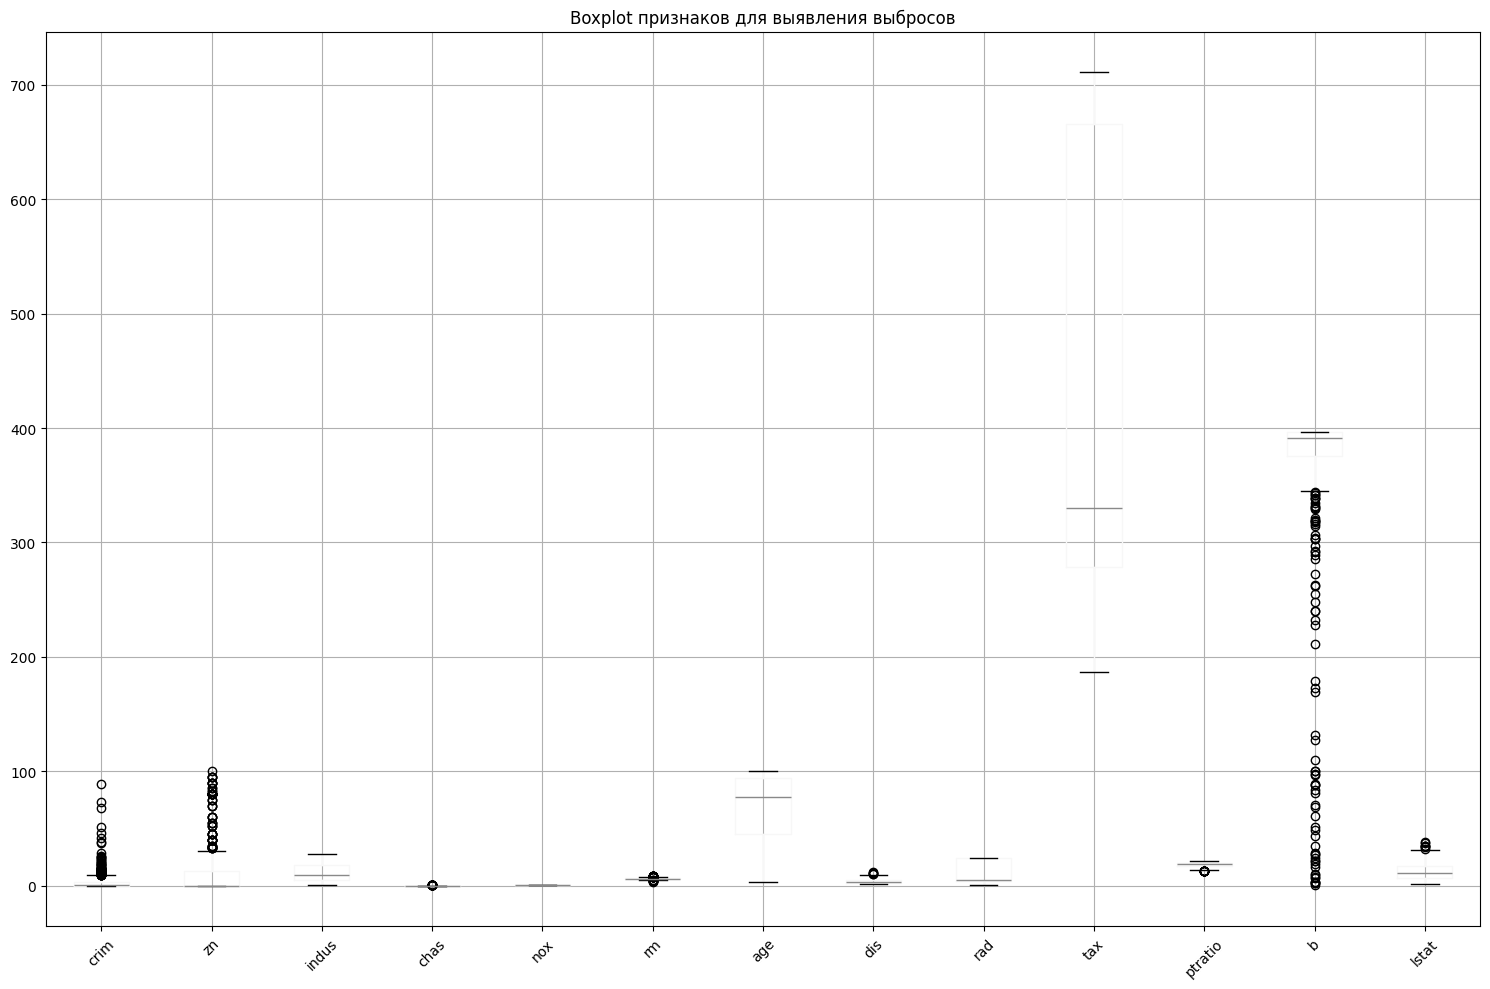


📈 Гистограммы распределений:


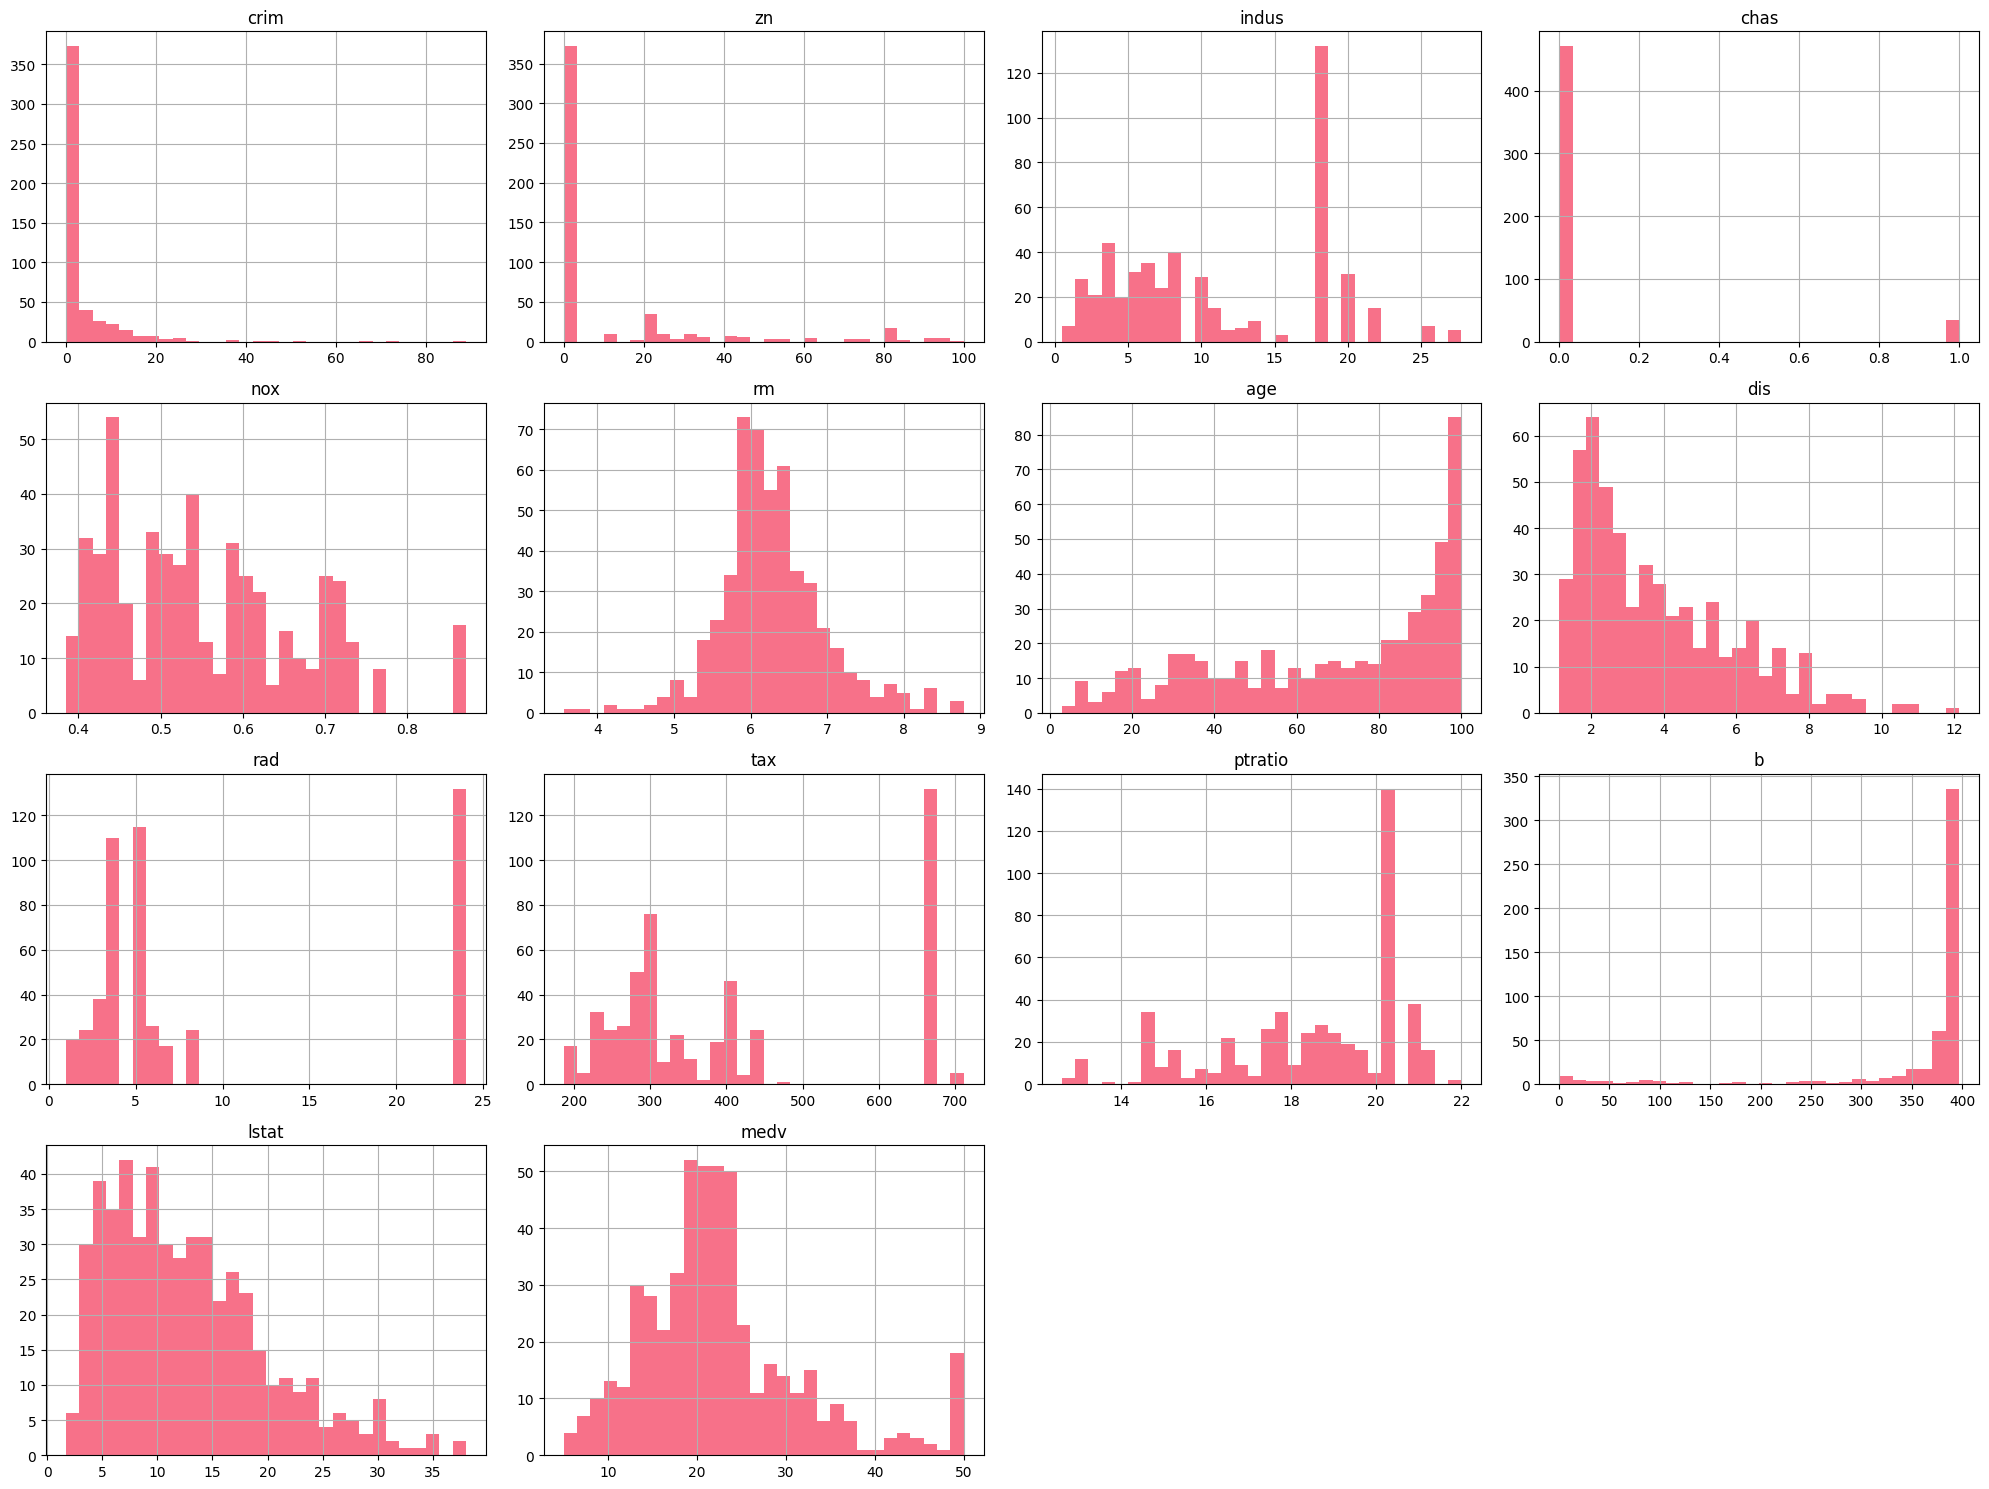


🔍 КОЛИЧЕСТВО ВЫБРОСОВ ПО КАЖДОМУ ПРИЗНАКУ (метод IQR):
  crim: 66 выбросов
  zn: 68 выбросов
  chas: 35 выбросов
  rm: 30 выбросов
  dis: 5 выбросов
  ptratio: 15 выбросов
  b: 77 выбросов
  lstat: 7 выбросов

ПУНКТ 2: РАЗДЕЛЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ
📊 Признаки (X): (506, 13)
🎯 Целевая переменная (y): (506,)

✅ Разделение выполнено:
Обучающая выборка: 404 samples
Тестовая выборка: 102 samples
✅ Масштабирование признаков завершено

ПУНКТ 3: ОБУЧЕНИЕ ТРЕХ МОДЕЛЕЙ
🔄 Обучение моделей...
✅ Линейная регрессия обучена
✅ Дерево решений обучено
✅ Случайный лес обучен

ПУНКТ 4: ОЦЕНКА КАЧЕСТВА МОДЕЛЕЙ
📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ:
-----------------------------------------------------------------
Модель               MSE          MAE          R²          
-----------------------------------------------------------------
Linear Regression    24.29        3.19         0.6688      
Decision Tree        10.42        2.39         0.8580      
Random Forest        7.91         2.04         0

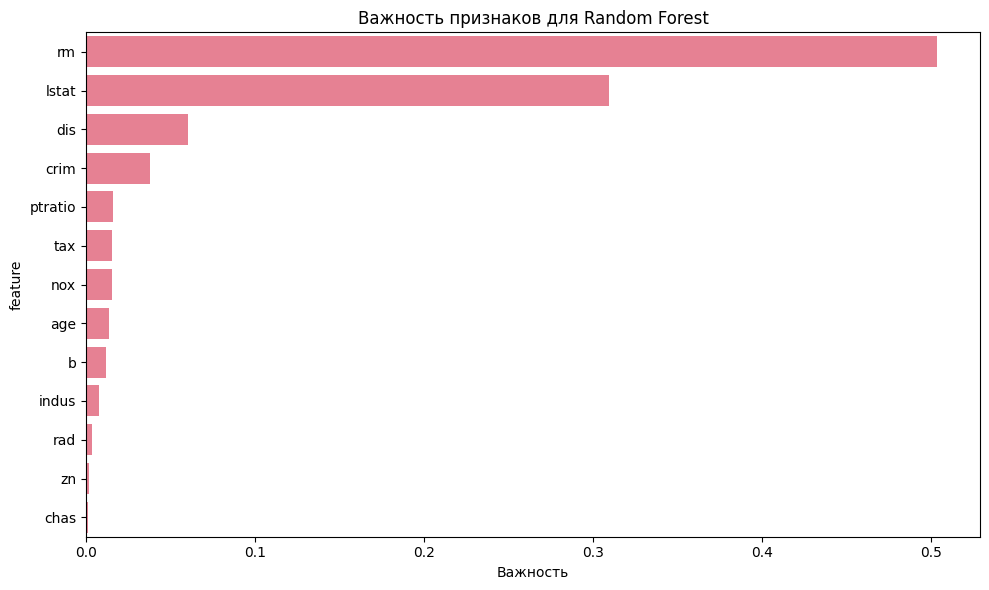


📈 СРАВНЕНИЕ ПРЕДСКАЗАНИЙ С РЕАЛЬНЫМИ ЗНАЧЕНИЯМИ:


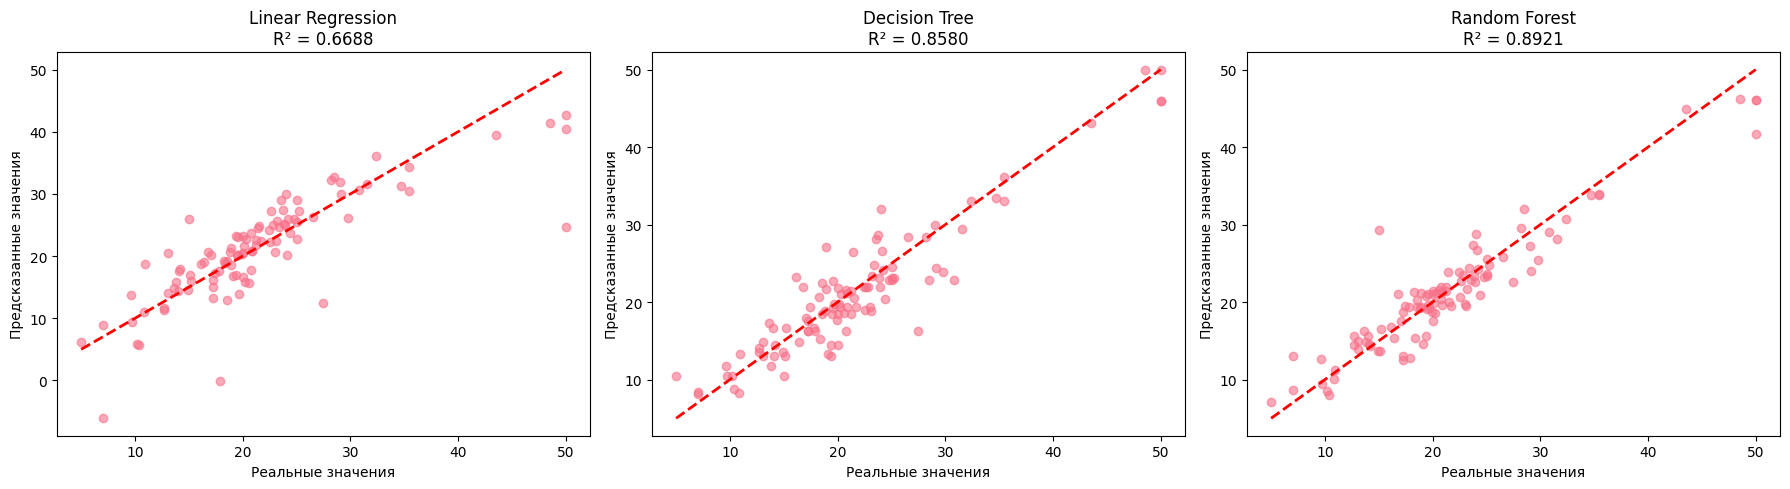


🎯 ИТОГОВЫЙ ВЫВОД
1. КАЧЕСТВО МОДЕЛЕЙ:
   Random Forest: R² = 0.8921
   Decision Tree: R² = 0.8580
   Linear Regression: R² = 0.6688

2. ЛУЧШАЯ МОДЕЛЬ: Random Forest
   Почему: имеет наибольший R² и наименьшие ошибки

3. ВАЖНЫЕ ПРИЗНАКИ для предсказания цены домов:
   - rm: важность = 0.504
   - lstat: важность = 0.310
   - dis: важность = 0.061

4. ЗАКЛЮЧЕНИЕ:
   Случайный лес показал наилучшие результаты благодаря
   способности учитывать сложные нелинейные зависимости
   между признаками и ценой домов.

✅ ЛАБОРАТОРНАЯ РАБОТА ЗАВЕРШЕНА!


In [22]:
# @title
# ========== ПОЛНЫЙ КОД ЛАБОРАТОРНОЙ РАБОТЫ ==========

# 1. Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("🎯 ЛАБОРАТОРНАЯ РАБОТА №1 - ЗАДАЧА РЕГРЕССИИ")
print("=" * 60)

# 2. Загрузка данных
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print("✅ Boston Housing dataset успешно загружен!")

print(f"📊 Размер датасета: {df.shape}")
print("📝 Названия столбцов:", df.columns.tolist())

# 3. Описание признаков
feature_descriptions = {
    'crim': 'Уровень преступности на душу населения',
    'zn': 'Доля земель под частные дома',
    'indus': 'Доля земель под бизнес',
    'chas': 'Прилегает к реке Чарльз (1 = да, 0 = нет)',
    'nox': 'Концентрация оксидов азота',
    'rm': 'Среднее количество комнат в доме',
    'age': 'Доля домов, построенных до 1940 года',
    'dis': 'Взвешенное расстояние до рабочих центров',
    'rad': 'Индекс доступности к автомагистралям',
    'tax': 'Налог на имущество',
    'ptratio': 'Соотношение учеников и учителей в школах',
    'b': 'Пропорция афроамериканского населения',
    'lstat': 'Доля населения с низким статусом (%)',
    'medv': 'Медианная стоимость домов ($1000) - ЦЕЛЕВАЯ ПЕРЕМЕННАЯ'
}

print("\n📋 ОПИСАНИЕ ПРИЗНАКОВ:")
for feature, description in feature_descriptions.items():
    print(f"🔹 {feature}: {description}")

print("\nПервые 5 строк данных:")
display(df.head())

# 4. Проверка пропусков и выбросов (Пункт 1 задания)
print("\n" + "=" * 50)
print("ПУНКТ 1: ПРОВЕРКА ПРОПУСКОВ И ВЫБРОСОВ")
print("=" * 50)

# Проверка пропущенных значений
print("🔍 Пропущенные значения:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✅ Пропущенных значений нет!")
else:
    print(f"❌ Найдено пропущенных значений: {missing_values.sum()}")

# Визуализация для выявления выбросов
print("\n📊 Визуализация распределений для выявления выбросов...")

# Boxplot для всех признаков
plt.figure(figsize=(15, 10))
df_boxplot = df.drop('medv', axis=1)
df_boxplot.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot признаков для выявления выбросов')
plt.tight_layout()
plt.show()

# Гистограммы распределений
print("\n📈 Гистограммы распределений:")
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Анализ выбросов по методу IQR
print("\n🔍 КОЛИЧЕСТВО ВЫБРОСОВ ПО КАЖДОМУ ПРИЗНАКУ (метод IQR):")

for column in df.columns:
    if column != 'medv':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        if len(outliers) > 0:
            print(f"  {column}: {len(outliers)} выбросов")

# 5. Разделение данных на обучающую и тестовую выборки (Пункт 2 задания)
print("\n" + "=" * 50)
print("ПУНКТ 2: РАЗДЕЛЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ")
print("=" * 50)

X = df.drop('medv', axis=1)
y = df['medv']

print(f"📊 Признаки (X): {X.shape}")
print(f"🎯 Целевая переменная (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"\n✅ Разделение выполнено:")
print(f"Обучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Масштабирование признаков завершено")

# 6. Обучение трех моделей (Пункт 3 задания)
print("\n" + "=" * 50)
print("ПУНКТ 3: ОБУЧЕНИЕ ТРЕХ МОДЕЛЕЙ")
print("=" * 50)

print("🔄 Обучение моделей...")

# Линейная регрессия
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
print("✅ Линейная регрессия обучена")

# Дерево решений
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
print("✅ Дерево решений обучено")

# Случайный лес
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
print("✅ Случайный лес обучен")

# 7. Оценка качества моделей (Пункт 4 задания)
print("\n" + "=" * 50)
print("ПУНКТ 4: ОЦЕНКА КАЧЕСТВА МОДЕЛЕЙ")
print("=" * 50)

models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

results = []

print("📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ:")
print("-" * 65)
print(f"{'Модель':<20} {'MSE':<12} {'MAE':<12} {'R²':<12}")
print("-" * 65)

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'model': name,
        'mse': mse,
        'mae': mae,
        'r2': r2
    })

    print(f"{name:<20} {mse:<12.2f} {mae:<12.2f} {r2:<12.4f}")

print("-" * 65)

# 8. Анализ результатов и выводы (Пункт 5 задания)
print("\n" + "=" * 50)
print("ПУНКТ 5: АНАЛИЗ И ВЫВОДЫ")
print("=" * 50)

# Определение лучшей модели
best_model = max(results, key=lambda x: x['r2'])
print(f"🏆 ЛУЧШАЯ МОДЕЛЬ: {best_model['model']}")
print(f"   R² = {best_model['r2']:.4f}, MSE = {best_model['mse']:.2f}")

# Важность признаков для Random Forest
print("\n🔍 ВАЖНОСТЬ ПРИЗНАКОВ (Random Forest):")

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

print(feature_importance_df)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='importance', y='feature')
plt.title('Важность признаков для Random Forest')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

# Сравнение предсказаний с реальными значениями
print("\n📈 СРАВНЕНИЕ ПРЕДСКАЗАНИЙ С РЕАЛЬНЫМИ ЗНАЧЕНИЯМИ:")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)

    axes[i].scatter(y_test, y_pred, alpha=0.6)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[i].set_xlabel('Реальные значения')
    axes[i].set_ylabel('Предсказанные значения')
    axes[i].set_title(f'{name}\nR² = {r2_score(y_test, y_pred):.4f}')

plt.tight_layout()
plt.show()

# Итоговый вывод
print("\n" + "=" * 50)
print("🎯 ИТОГОВЫЙ ВЫВОД")
print("=" * 50)

print("1. КАЧЕСТВО МОДЕЛЕЙ:")
for result in sorted(results, key=lambda x: x['r2'], reverse=True):
    print(f"   {result['model']}: R² = {result['r2']:.4f}")

print(f"\n2. ЛУЧШАЯ МОДЕЛЬ: {best_model['model']}")
print("   Почему: имеет наибольший R² и наименьшие ошибки")

print("\n3. ВАЖНЫЕ ПРИЗНАКИ для предсказания цены домов:")
top_features = feature_importance_df.head(3)
for _, row in top_features.iterrows():
    print(f"   - {row['feature']}: важность = {row['importance']:.3f}")

print("\n4. ЗАКЛЮЧЕНИЕ:")
print("   Случайный лес показал наилучшие результаты благодаря")
print("   способности учитывать сложные нелинейные зависимости")
print("   между признаками и ценой домов.")

print("\n" + "=" * 50)
print("✅ ЛАБОРАТОРНАЯ РАБОТА ЗАВЕРШЕНА!")
print("=" * 50)